In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the function to replace cv2.imshow()

In [ ]:
from PIL import Image

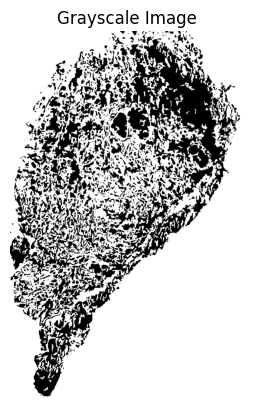

226903

In [ ]:
# Load the new image
new_image_path = "/content/segmented_image.jpg"
new_image = Image.open(new_image_path).convert("L")  # Convert to grayscale

# Convert image to numpy array
new_image_array = np.array(new_image)

# Calculate the area of the black region (assuming the image is already thresholded and black regions are the darkest pixels)
new_black_area = np.sum(new_image_array == 0)  # Count the number of black pixels

# Display the image for reference
plt.imshow(new_image_array, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

new_black_area


Contour area: 64916.5


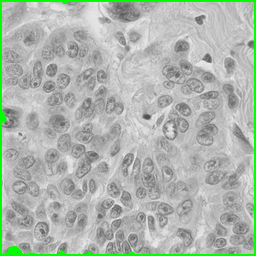

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/01_2 .png', cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate and display the area of each contour
for contour in contours:
    area = cv2.contourArea(contour)
    print("Contour area:", area)

# Optionally, draw contours on the original image
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

# Display the result
cv2_imshow(output_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [ ]:
# Apply a threshold to binarize the image
threshold = 128
binary_image = image_array < threshold  # Black regions will be True, white regions will be False

# Calculate the area of the black region
black_area = np.sum(binary_image)

# Calculate the total area of the circle
# We can approximate the circle area by counting all non-zero pixels in the binary image (since the rest is black background)
total_area = np.sum(image_array > threshold)

# Display the binary image
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

black_area, total_area


NameError: name 'image_array' is not defined

##(1) image segmantation using thersholding


* This approach are suitable for image where there is distinct difference between object and background.

* Convert the image to grayscale and apply a threshold to separate foreground and background.

ex:- Segmentation of text from a document image.





size =  (374, 637, 3)
max  =  255
min  =  4
size =  (374, 637)
max  =  255
min  =  49


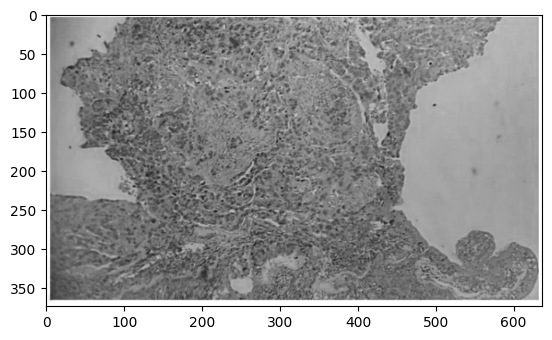

area =  220209
size =  (374, 637)
max  =  255.0
min  =  0.0


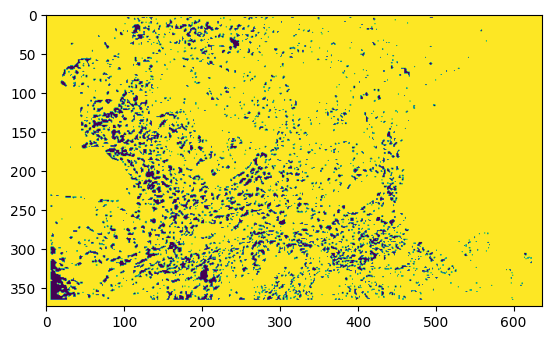

In [ ]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

img = imread('/content/tumor107.jpg')

def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

howis(img)

X = img[:,:,0]
howis(X)
plt.imshow(X,cmap='gray')
plt.show()

def segmenta(X,t):
  (N,M) = X.shape
  Y = np.zeros((N,M))
  area = 0
  for i in range(N):
    for j in range(M):
      if X[i,j] > t:
        Y[i,j] = 255
        area = area + 1
  print('area = ',area)
  return Y

Y = segmenta(X,120) # good threshold is 120
howis(Y)
plt.imshow(Y)
plt.show()

##(2) histogram based segmentation

* Histogram-based segmentation is used to segment an image into different regions based on the intensity values of its pixels.
* by analyzing histogram, you can identify thresholds that separate different regions in the image.

* Identify peaks and valleys in the histogram. Peaks often correspond to the dominant intensity values in different regions of the image.
* Valleys between peaks can be used to define thresholds for segmentation.





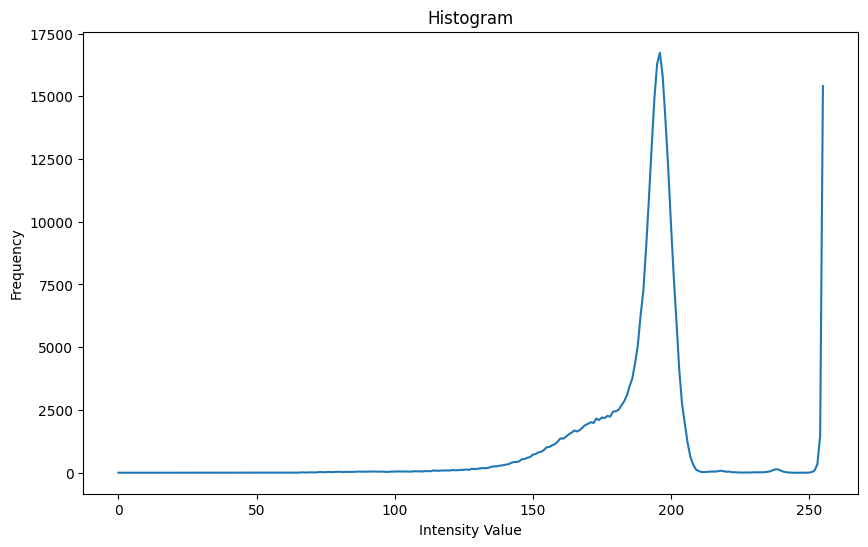

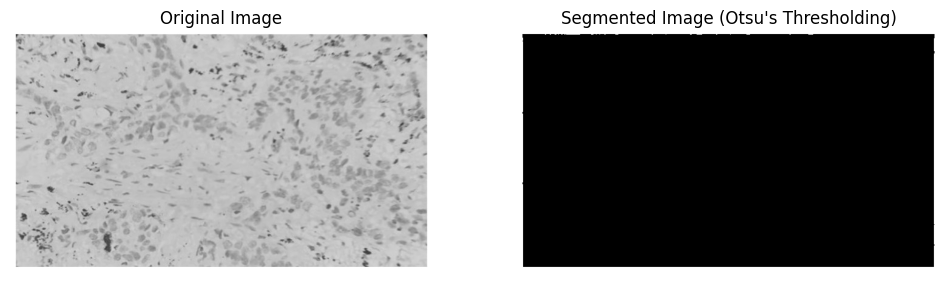

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/tumor108.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Compute the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Display the histogram
plt.figure(figsize=(10,6))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

# Apply Otsu's thresholding
_, segmented_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and segmented images
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Otsu\'s Thresholding)')
plt.axis('off')

plt.show()


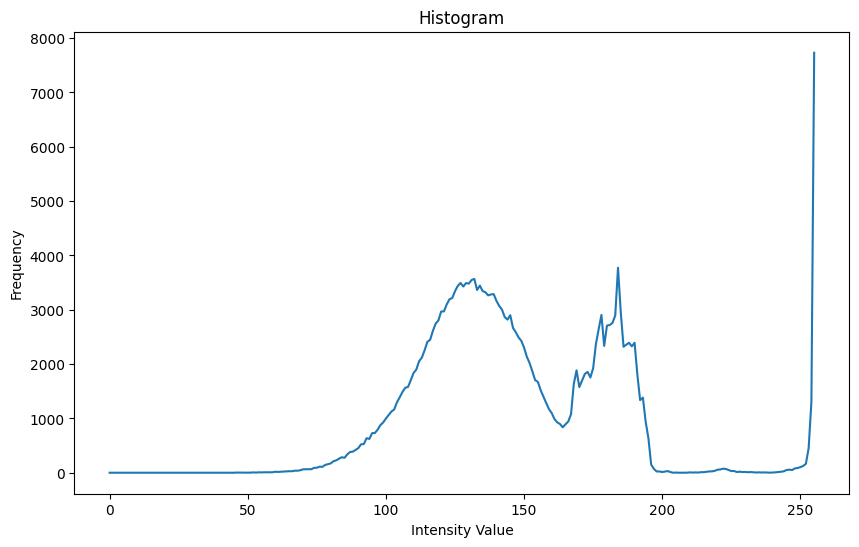

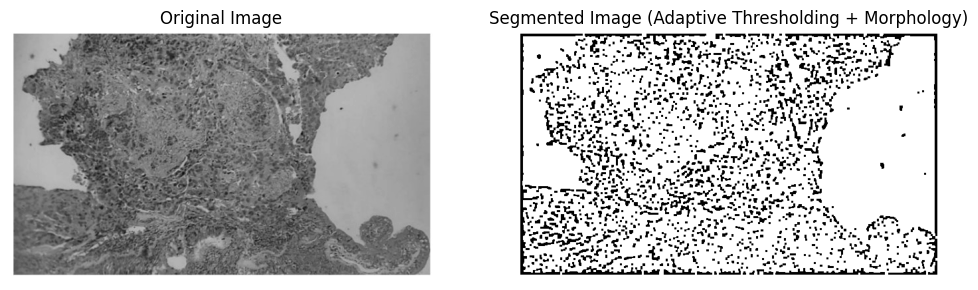

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/tumor107.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Compute the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Display the histogram
plt.figure(figsize=(10,6))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

# Apply adaptive thresholding
segmented_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply morphological operations to refine the segmentation
kernel = np.ones((3,3), np.uint8)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, kernel)

# Display the original and segmented images
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Adaptive Thresholding + Morphology)')
plt.axis('off')

plt.show()

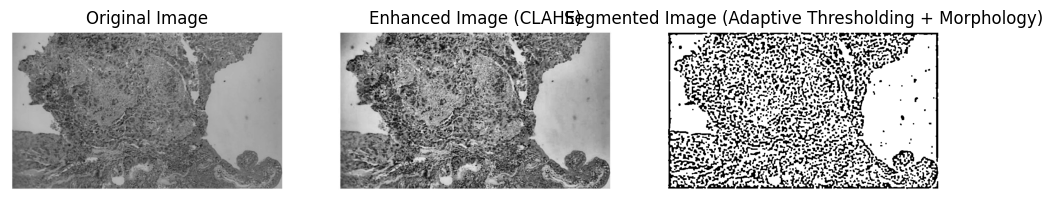

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/tumor107.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(image)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

# Apply adaptive thresholding
adaptive_thresh_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)

# Apply morphological operations to refine the segmentation
# Use a closing operation to fill small holes
kernel = np.ones((3, 3), np.uint8)
refined_image = cv2.morphologyEx(adaptive_thresh_image, cv2.MORPH_CLOSE, kernel)

# Use an opening operation to remove small noise
refined_image = cv2.morphologyEx(refined_image, cv2.MORPH_OPEN, kernel)

# Display the original and processed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image (CLAHE)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(refined_image, cmap='gray')
plt.title('Segmented Image (Adaptive Thresholding + Morphology)')
plt.axis('off')

plt.show()


#new code

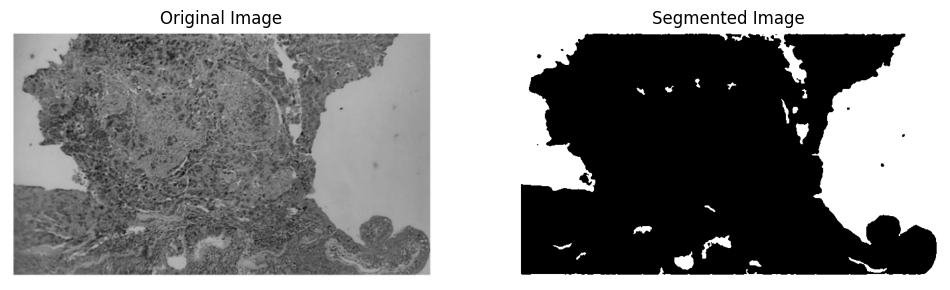

In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, morphology
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/tumor107.jpg'
image = io.imread(image_path, as_gray=True)

# Apply Gaussian blur to smooth the image
blurred_image = filters.gaussian(image, sigma=1)


# Apply thresholding to segment positive cells
# You may need to adjust the threshold value
threshold_value = filters.threshold_otsu(blurred_image)
binary_image = blurred_image > threshold_value

# Remove small objects (noise) from the binary image
cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=50)

# Label the connected components
label_image = measure.label(cleaned_binary_image)

# Extract properties of labeled regions
regions = measure.regionprops(label_image)

# Display the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Segmented image
segmented_image = np.zeros_like(image)
for region in regions:
    # Draw filled regions on the segmented image
    for coord in region.coords:
        segmented_image[coord[0], coord[1]] = 1

ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

# Save the segmented image if needed
segmented_image_path = 'segmented_image.jpg'
io.imsave(segmented_image_path, segmented_image.astype(np.uint8) * 255)


##used for object detection

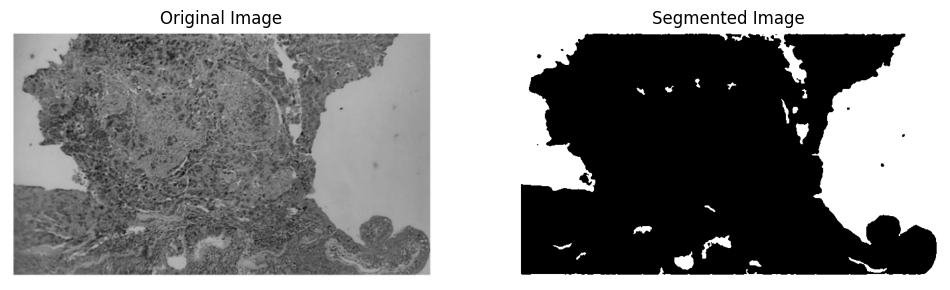

In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, morphology
import matplotlib.pyplot as plt

# Load the image
image_path = 'tumor107.jpg'  # Change this to the correct path if needed
image = io.imread(image_path, as_gray=True)

# Apply Gaussian blur to smooth the image
blurred_image = filters.gaussian(image, sigma=1)

# Apply thresholding to segment positive cells
threshold_value = filters.threshold_otsu(blurred_image)
binary_image = blurred_image > threshold_value

# Remove small objects (noise) from the binary image
cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=50)

# Label the connected components
label_image = measure.label(cleaned_binary_image)

# Extract properties of labeled regions
regions = measure.regionprops(label_image)

# Create an empty image with black background
segmented_image = np.zeros_like(image)

# Set the background to black (pixel value 0) and tumor region to gray (e.g., pixel value 128)
gray_value = 128
for region in regions:
    for coord in region.coords:
        segmented_image[coord[0], coord[1]] = gray_value

# Display the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Segmented image
ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

# Save the segmented image if needed
segmented_image_path = 'segmented_image.jpg'
io.imsave(segmented_image_path, segmented_image.astype(np.uint8))

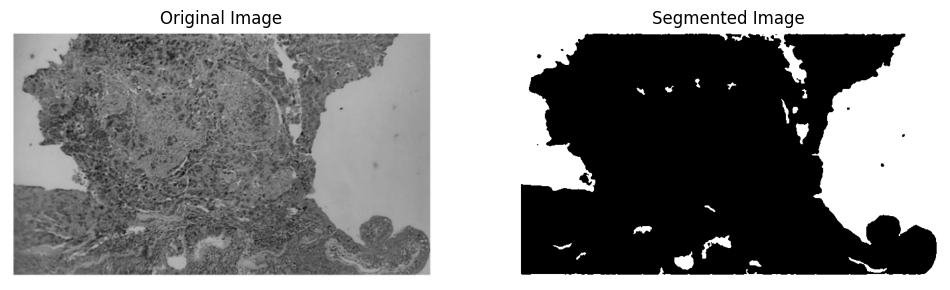

In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, morphology
import matplotlib.pyplot as plt

# Load the image
image_path = 'tumor107.jpg'  # Change this to the correct path if needed
image = io.imread(image_path, as_gray=True)

# Apply Gaussian blur to smooth the image
blurred_image = filters.gaussian(image, sigma=1)

# Apply thresholding to segment positive cells
threshold_value = filters.threshold_otsu(blurred_image)
binary_image = blurred_image > threshold_value

# Remove small objects (noise) from the binary image
cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=50)

# Label the connected components
label_image = measure.label(cleaned_binary_image)

# Extract properties of labeled regions
regions = measure.regionprops(label_image)

# Create an empty image with black background
segmented_image = np.zeros_like(image)

# Set the background to black (pixel value 0) and tumor region to gray (e.g., pixel value 128)
gray_value = 128
for region in regions:
    for coord in region.coords:
        segmented_image[coord[0], coord[1]] = gray_value

# Display the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Segmented image
ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

# Save the segmented image if needed
segmented_image_path = 'segmented_image.jpg'
io.imsave(segmented_image_path, segmented_image.astype(np.uint8))

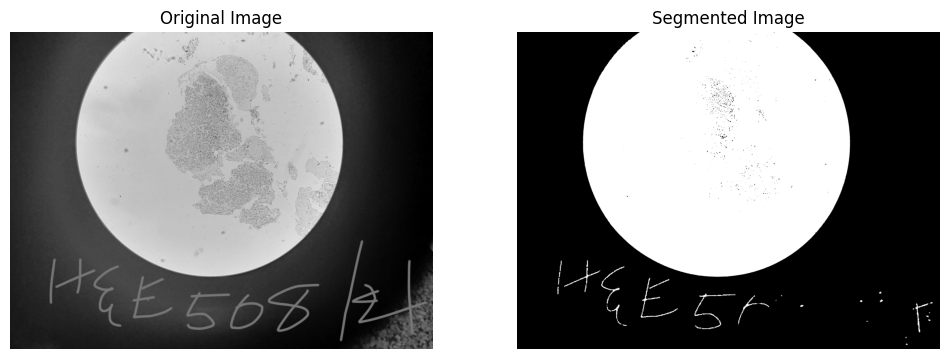

In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, morphology
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/WhatsApp Image 2024-06-12 at 11.32.03 PM.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(image)

# Apply Gaussian blur to smooth the image
blurred_image = filters.gaussian(image, sigma=1)

# Apply thresholding to segment positive cells
# You may need to adjust the threshold value
threshold_value = filters.threshold_otsu(blurred_image)
binary_image = blurred_image > threshold_value

# Remove small objects (noise) from the binary image
cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=50)

# Label the connected components
label_image = measure.label(cleaned_binary_image)

# Extract properties of labeled regions
regions = measure.regionprops(label_image)

# Display the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Segmented image
segmented_image = np.zeros_like(image)
for region in regions:
    # Draw filled regions on the segmented image
    for coord in region.coords:
        segmented_image[coord[0], coord[1]] = 1

ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

# Save the segmented image if needed
segmented_image_path = 'segmented_image.jpg'
io.imsave(segmented_image_path, segmented_image.astype(np.uint8) * 255)


###most efficient

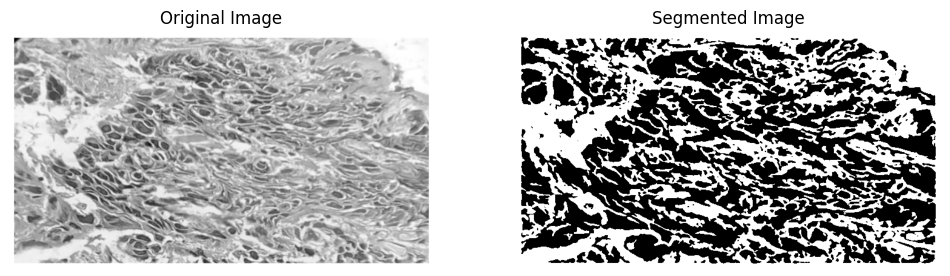

In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, morphology
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/tumor104.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(image)

# Apply Gaussian blur to smooth the enhanced image
blurred_image = filters.gaussian(enhanced_image, sigma=1)

# Apply thresholding to segment positive cells
# You may need to adjust the threshold value
threshold_value = filters.threshold_otsu(blurred_image)
binary_image = blurred_image > threshold_value

# Remove small objects (noise) from the binary image
cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=50)

# Label the connected components
label_image = measure.label(cleaned_binary_image)

# Extract properties of labeled regions
regions = measure.regionprops(label_image)

# Display the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Segmented image
segmented_image = np.zeros_like(image, dtype=np.uint8)  # Ensure segmented_image is initialized correctly
for region in regions:
    # Draw filled regions on the segmented image
    for coord in region.coords:
        segmented_image[coord[0], coord[1]] = 255  # Set pixel intensity to 255 for segmented regions

ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

# Save the segmented image if needed
segmented_image_path = 'segmented_image.jpg'
io.imsave(segmented_image_path, segmented_image)


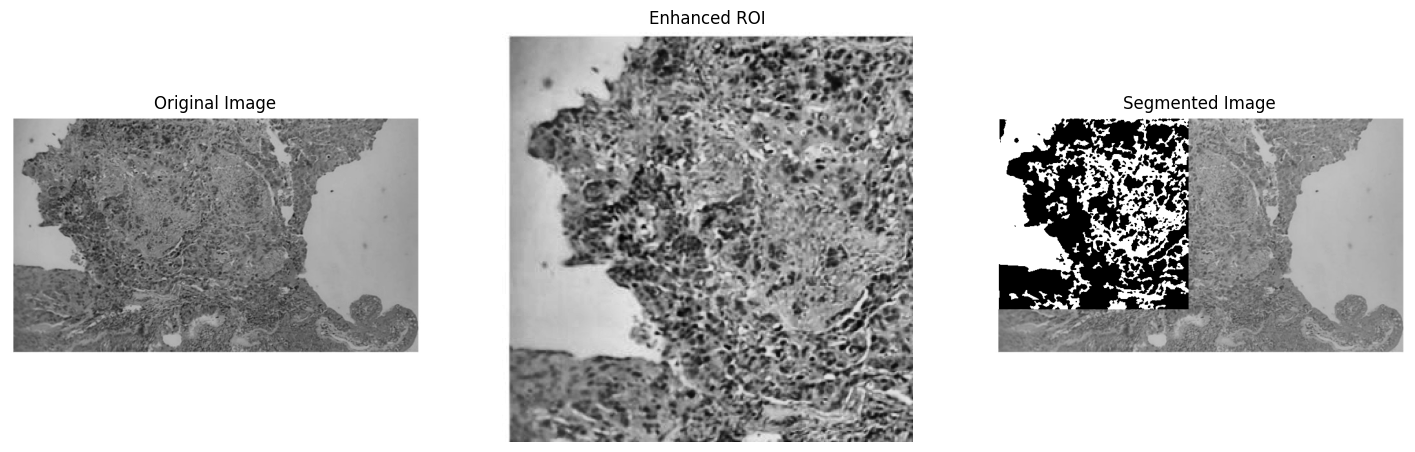

In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, morphology
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/tumor107.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the coordinates for the region of interest (ROI)
x1, y1, x2, y2 = 0, 0, 300, 300  # Example coordinates, adjust as needed

# Extract the ROI from the image
roi = image[y1:y2, x1:x2]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the ROI
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_roi = clahe.apply(roi)

# Apply Gaussian blur to smooth the enhanced ROI
blurred_roi = filters.gaussian(enhanced_roi, sigma=1)

# Apply thresholding to segment positive cells
threshold_value = filters.threshold_otsu(blurred_roi)
binary_roi = blurred_roi > threshold_value

# Remove small objects (noise) from the binary ROI
cleaned_binary_roi = morphology.remove_small_objects(binary_roi, min_size=50)

# Label the connected components
label_roi = measure.label(cleaned_binary_roi)

# Extract properties of labeled regions
regions = measure.regionprops(label_roi)

# Create an empty image for the segmented ROI
segmented_roi = np.zeros_like(roi, dtype=np.uint8)

# Draw filled regions on the segmented ROI
for region in regions:
    for coord in region.coords:
        segmented_roi[coord[0], coord[1]] = 255  # Set pixel intensity to 255 for segmented regions

# Integrate the segmented ROI back into the original image
segmented_image = np.copy(image)
segmented_image[y1:y2, x1:x2] = segmented_roi

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Enhanced ROI
ax[1].imshow(enhanced_roi, cmap='gray')
ax[1].set_title('Enhanced ROI')
ax[1].axis('off')

# Segmented image
ax[2].imshow(segmented_image, cmap='gray')
ax[2].set_title('Segmented Image')
ax[2].axis('off')

plt.show()

# Save the segmented image if needed
segmented_image_path = 'segmented_image.jpg'
io.imsave(segmented_image_path, segmented_image)


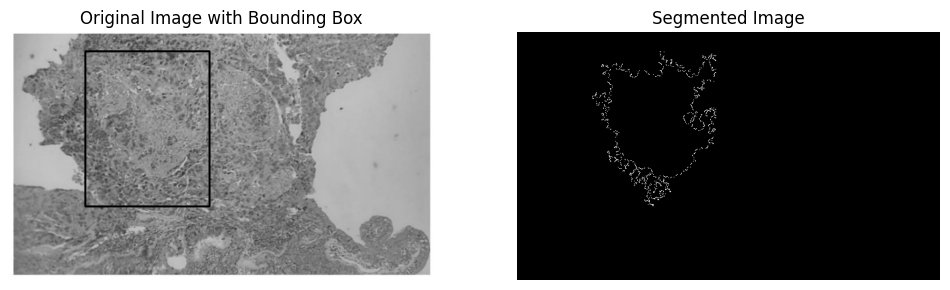

Area: 21204.5 px
Perimeter: 2135.1870609521866 px


<ipython-input-7-972e7b7428f8>:76: UserWarning: segmented_image.jpg is a low contrast image
  io.imsave(segmented_image_path, segmented_image)


In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, morphology
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/tumor107.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the coordinates for the region of interest (ROI)
x1, y1, x2, y2 = 0, 0, 300, 300  # Example coordinates, adjust as needed

# Extract the ROI from the image
roi = image[y1:y2, x1:x2]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the ROI
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_roi = clahe.apply(roi)

# Apply Gaussian blur to smooth the enhanced ROI
blurred_roi = filters.gaussian(enhanced_roi, sigma=1)

# Apply thresholding to segment positive cells
threshold_value = filters.threshold_otsu(blurred_roi)
binary_roi = blurred_roi > threshold_value

# Remove small objects (noise) from the binary ROI
cleaned_binary_roi = morphology.remove_small_objects(binary_roi, min_size=50)

# Convert the cleaned binary ROI to uint8 for contour detection
cleaned_binary_roi_uint8 = (cleaned_binary_roi * 255).astype(np.uint8)

# Find contours in the cleaned binary ROI
contours, _ = cv2.findContours(cleaned_binary_roi_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# If no contours are found, print a message and return
if not contours:
    print("No tumor detected")
    exit()

# Find the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Draw the bounding box around the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)
cv2.rectangle(image, (x1 + x, y1 + y), (x1 + x + w, y1 + y + h), (0, 255, 0), 2)

# Calculate area and perimeter
area = cv2.contourArea(largest_contour)
perimeter = cv2.arcLength(largest_contour, True)

# Display the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image with bounding box
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image with Bounding Box')
ax[0].axis('off')

# Segmented image
segmented_image = np.zeros_like(image, dtype=np.uint8)
for coord in largest_contour:
    segmented_image[coord[0][1], coord[0][0]] = 255  # Set pixel intensity to 255 for segmented regions

ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

print(f"Area: {area} px")
print(f"Perimeter: {perimeter} px")

# Save the segmented image if needed
segmented_image_path = 'segmented_image.jpg'
io.imsave(segmented_image_path, segmented_image)


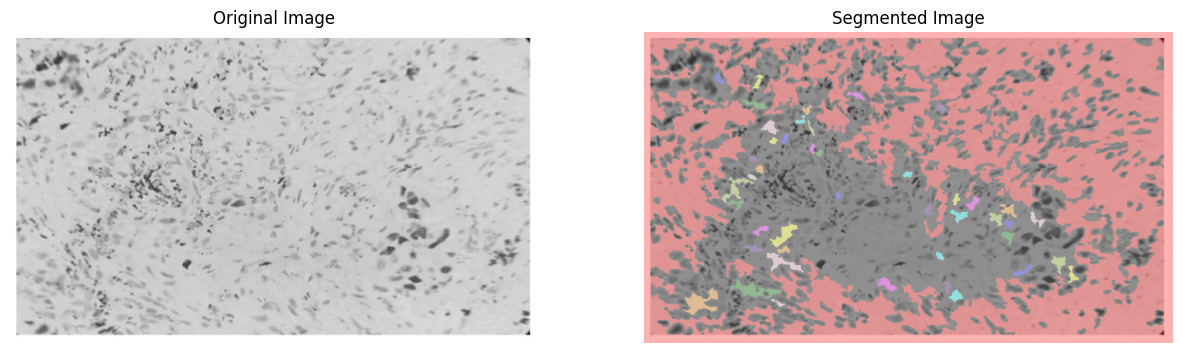

In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, morphology, exposure
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = io.imread(image_path, as_gray=True)
    # Enhance contrast using histogram equalization
    image = exposure.equalize_hist(image)
    # Apply Gaussian blur to smooth the image
    blurred_image = filters.gaussian(image, sigma=1)
    return blurred_image

# Function to segment positive cells
def segment_positive_cells(blurred_image):
    # Apply Otsu's thresholding
    threshold_value = filters.threshold_otsu(blurred_image)
    binary_image = blurred_image > threshold_value
    # Remove small objects (noise) from the binary image
    cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=50)
    # Fill small holes in the binary image
    cleaned_binary_image = morphology.remove_small_holes(cleaned_binary_image, area_threshold=50)
    # Label the connected components
    label_image = measure.label(cleaned_binary_image)
    return label_image

# Function to visualize the results
def visualize_segmentation(original_image, label_image):
    # Create an overlay image
    overlay = color.label2rgb(label_image, image=original_image, bg_label=0, alpha=0.3)
    # Display the original and overlay images
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(overlay)
    ax[1].set_title('Segmented Image')
    ax[1].axis('off')
    plt.show()

# Main function
def main(image_path):
    # Preprocess the image
    blurred_image = preprocess_image(image_path)
    # Segment positive cells
    label_image = segment_positive_cells(blurred_image)
    # Visualize the segmentation
    original_image = io.imread(image_path, as_gray=True)
    visualize_segmentation(original_image, label_image)

# Example usage
image_path = '/content/tumor109.jpg'  # Replace with your image path
main(image_path)

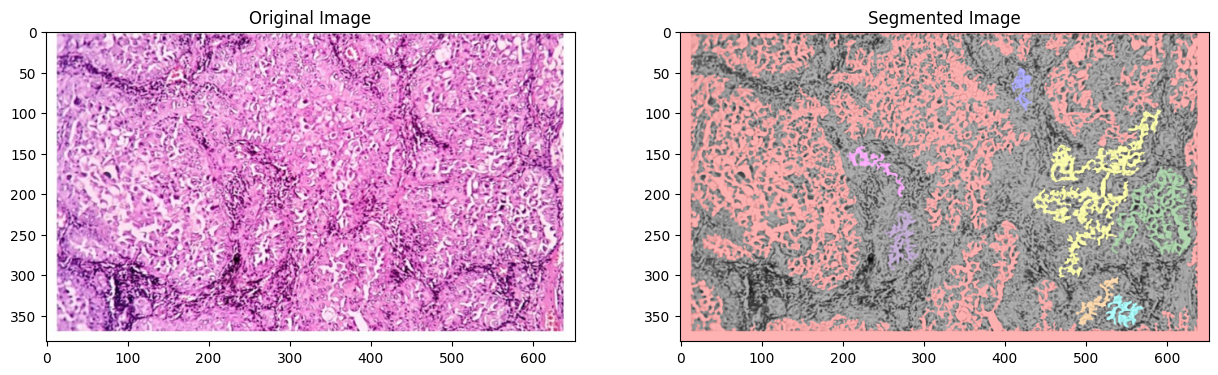

In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, color, morphology
import matplotlib.pyplot as plt

# Function to read and preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = io.imread(image_path)
    # Convert to grayscale
    gray = color.rgb2gray(image)
    # Apply Gaussian blur to reduce noise
    blurred = filters.gaussian(gray, sigma=1)
    return blurred

# Function to apply thresholding and segment positive cells
def segment_positive_cells(gray_image, threshold_value):
    # Apply adaptive threshold
    binary_image = gray_image > filters.threshold_otsu(gray_image)
    # Remove small objects
    cleaned_image = morphology.remove_small_objects(binary_image, min_size=500)
    # Label connected components
    labeled_image = measure.label(cleaned_image)
    return labeled_image

# Function to visualize the results
def visualize_segmentation(original_image, labeled_image):
    # Create an overlay image
    overlay = color.label2rgb(labeled_image, image=original_image, bg_label=0, alpha=0.3)
    # Display the original and overlay images
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    ax[0].imshow(original_image)
    ax[0].set_title('Original Image')
    ax[1].imshow(overlay)
    ax[1].set_title('Segmented Image')
    plt.show()

# Main function
def main(image_path, threshold_value):
    # Read and preprocess the image
    gray_image = preprocess_image(image_path)
    # Segment positive cells
    labeled_image = segment_positive_cells(gray_image, threshold_value)
    # Visualize the segmentation
    original_image = io.imread(image_path)
    visualize_segmentation(original_image, labeled_image)

# Example usage
image_path = '/content/tumor101.jpg'  # Replace with your image path
threshold_value = 0.5  # Adjust the threshold value as needed
main(image_path, threshold_value)

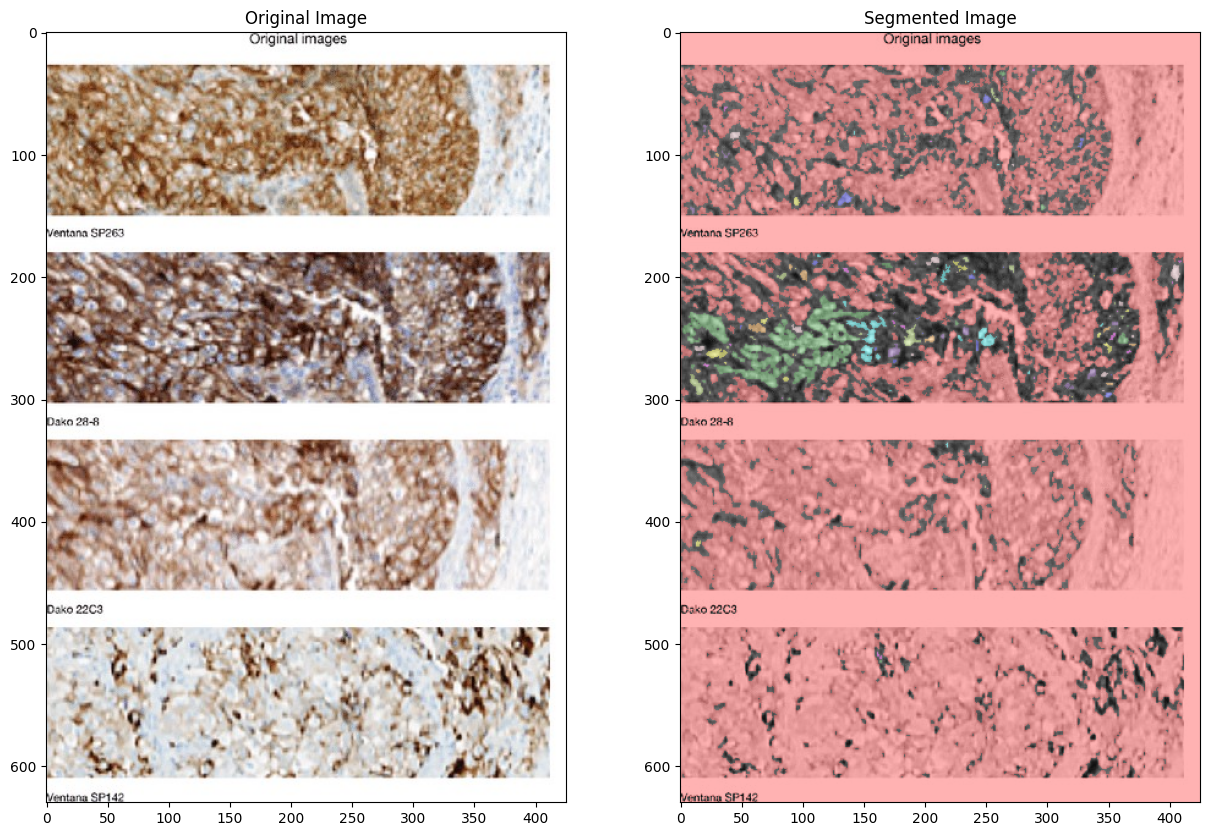

In [ ]:
import cv2
import numpy as np
from skimage import io, filters, measure, color
import matplotlib.pyplot as plt

# Function to read and preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = io.imread(image_path)
    # Convert to grayscale
    gray = color.rgb2gray(image)
    return gray

# Function to apply thresholding and segment positive cells
def segment_positive_cells(gray_image, threshold_value):
    # Apply threshold
    binary_image = gray_image > threshold_value
    # Label connected components
    labeled_image = measure.label(binary_image)
    return labeled_image

# Function to visualize the results
def visualize_segmentation(original_image, labeled_image):
    # Create an overlay image
    overlay = color.label2rgb(labeled_image, image=original_image, bg_label=0, alpha=0.3)
    # Display the original and overlay images
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    ax[0].imshow(original_image)
    ax[0].set_title('Original Image')
    ax[1].imshow(overlay)
    ax[1].set_title('Segmented Image')
    plt.show()

# Main function
def main(image_path, threshold_value):
    # Read and preprocess the image
    gray_image = preprocess_image(image_path)
    # Segment positive cells
    labeled_image = segment_positive_cells(gray_image, threshold_value)
    # Visualize the segmentation
    original_image = io.imread(image_path)
    visualize_segmentation(original_image, labeled_image)

# Example usage
image_path = '/content/tumor111.jpg'  # Replace with your image path
threshold_value = 0.5  # Adjust the threshold value as needed
main(image_path, threshold_value)


## (3) Region based segmentation

*  this approach is suitable for Images where regions have homogeneous properties.
* region based segmentation methods segments the image into various region having similar characteristics.
* there are two techniques which fall under this segmentation:-

1. Region growing
2. Region split







###1. Region growing segmentation


* Region growing segmentation method starts with a seed
point and grows the region by adding neighboring pixels that are similar in intensity or color to the seed. This process continues until no more pixels meet the criteria for inclusion in the region.

*   Here's an example of region growing segmentation using a simple intensity-based criterion:





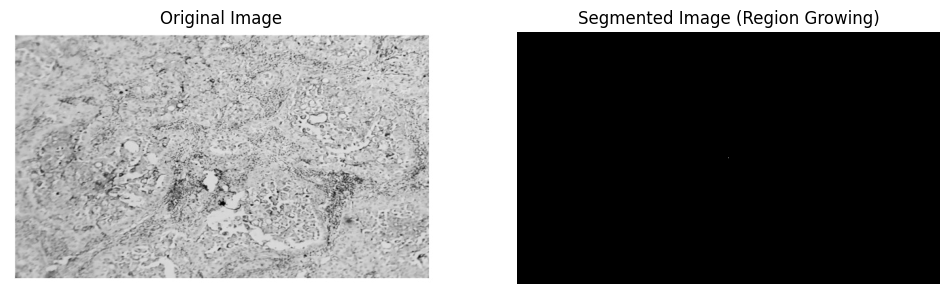

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed, threshold=10):
    # Initialize the segmented region and the list of pixels to check
    segmented = np.zeros_like(image)
    pixels_to_check = [seed]

    # Define the directions for 4-connectivity (N, E, S, W)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while pixels_to_check:
        # Get the current pixel to check
        x, y = pixels_to_check.pop(0)

        # Add the pixel to the segmented region
        segmented[x, y] = 255

        # Check neighboring pixels
        for direction in directions:
            nx, ny = x + direction[0], y + direction[1]

            # Check if the neighboring pixel is within the image bounds
            if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1]:
                # Check if the pixel meets the intensity criteria and is not already segmented
                if abs(int(image[nx, ny]) - int(image[x, y])) < threshold and segmented[nx, ny] == 0:
                    # Add the neighboring pixel to the list of pixels to check
                    pixels_to_check.append((nx, ny))
                    segmented[nx, ny] = 255

    return segmented

# Load the grayscale image
image_path = '/content/tumor103.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Choose a seed point (for example, the center of the image)
seed_point = (image.shape[0] // 2, image.shape[1] // 2)

# Perform region growing segmentation
segmented_image = region_growing(image, seed_point, threshold=10)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Region Growing)')
plt.axis('off')

plt.show()


###2. Region split and merge segmantation


* Region split and merge segmentation method involves the image is split into smaller regions that are checked for homogeneity. If regions are found to be homogeneous, they are merged together. If a region is not homogeneous, it is further split into smaller regions.





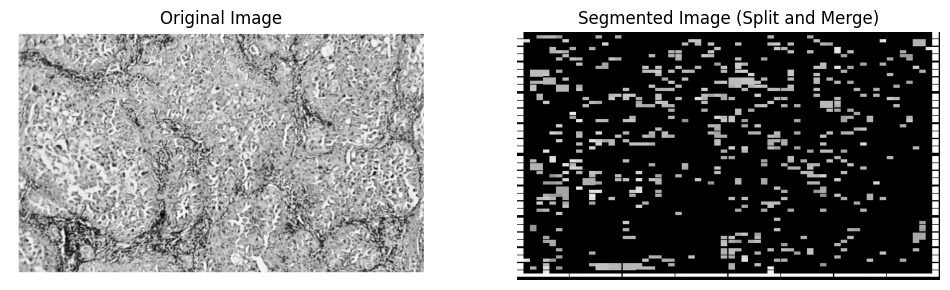

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def split_and_merge(image, threshold, min_size):
    def split_region(image, x, y, width, height, threshold):
        subregions = []
        region = image[y:y+height, x:x+width]
        if np.var(region) < threshold or min(width, height) <= min_size:
            subregions.append((x, y, width, height))
        else:
            half_width = width // 2
            half_height = height // 2
            subregions.extend(split_region(image, x, y, half_width, half_height, threshold))
            subregions.extend(split_region(image, x + half_width, y, half_width, half_height, threshold))
            subregions.extend(split_region(image, x, y + half_height, half_width, half_height, threshold))
            subregions.extend(split_region(image, x + half_width, y + half_height, half_width, half_height, threshold))
        return subregions

    def merge_regions(image, subregions, threshold):
        merged_image = np.zeros_like(image)
        label = 1
        for x, y, width, height in subregions:
            region = image[y:y+height, x:x+width]
            mean_value = np.mean(region)
            merged_image[y:y+height, x:x+width] = mean_value if np.var(region) < threshold else 0
        return merged_image

    initial_regions = split_region(image, 0, 0, image.shape[1], image.shape[0], threshold)
    segmented_image = merge_regions(image, initial_regions, threshold)
    return segmented_image

# Load the grayscale image
image_path = '/content/tumor101.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Parameters
threshold = 500  # Variance threshold for homogeneity
min_size = 8  # Minimum region size to stop splitting

# Perform split and merge segmentation
segmented_image = split_and_merge(image, threshold, min_size)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Split and Merge)')
plt.axis('off')

plt.show()


##(4) edge based segmantation



* this approach is suitable for Images where object boundaries are well-defined by changes in intensity or color.

* In Edge-based segmentation technique identifies the boundaries or edges within an image to segment it into different regions. This approach relies on detecting significant changes in intensity or color, which usually indicate the presence of object boundaries.



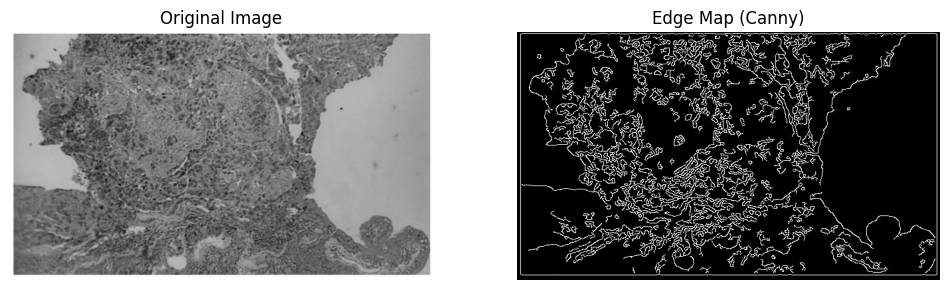

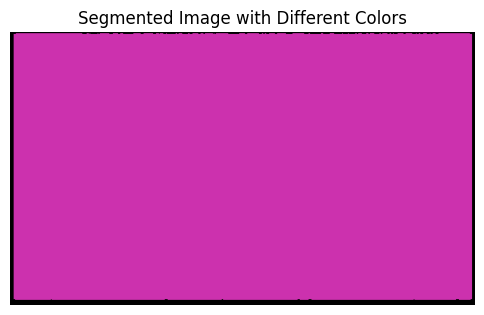

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/tumor107.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Smooth the image using Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Detect edges using the Canny edge detector
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Step 3: Display the original and edge-detected images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Map (Canny)')
plt.axis('off')

plt.show()

# Step 4: Use edges to segment the image using contours and fill different colors in each region
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank color image to draw contours on
segmented_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

# Fill each contour with a random color
for i, contour in enumerate(contours):
    color = np.random.randint(0, 255, size=3).tolist()  # Generate a random color
    cv2.drawContours(segmented_image, [contour], -1, color, cv2.FILLED)

# Display the segmented image with different colors
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with Different Colors')
plt.axis('off')
plt.show()


##(5) Clustering based segmentation


* This method is especially useful when the image has distinct regions that differ significantly in terms of pixel values.
*   List item



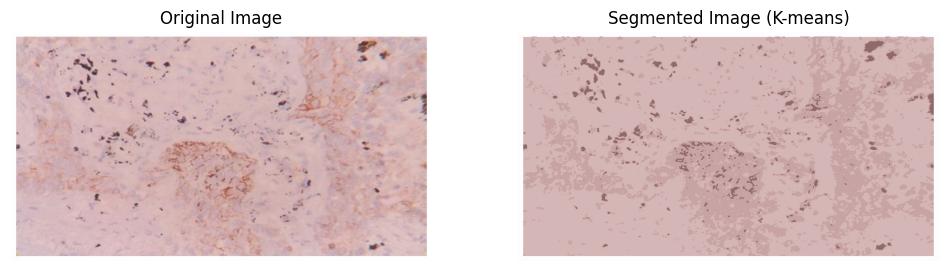

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
image_path = '/content/tumor110.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Preprocessing - Convert image to float32
image_flatten = image_rgb.reshape((-1, 3))
image_flatten = np.float32(image_flatten)

# Step 2: Define criteria and apply K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 4  # Number of clusters
_, labels, centers = cv2.kmeans(image_flatten, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Step 3: Convert back to 8-bit values and reshape the image
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)

# Step 4: Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image (K-means)')
plt.axis('off')

plt.show()


##(6) watershed based segmentation

* This method is particularly useful for separating touching or overlapping objects in an image.



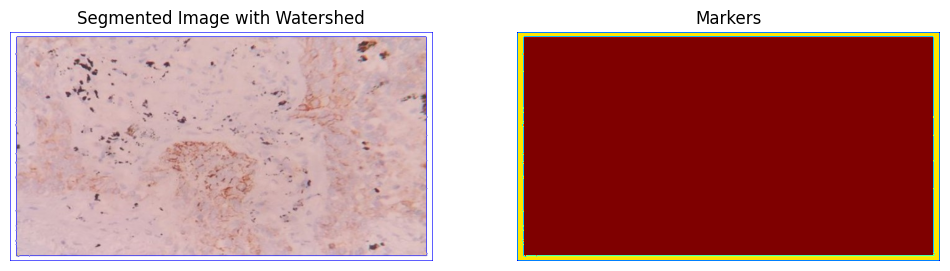

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/tumor110.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Preprocessing - Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 2: Edge Detection - Use the Canny edge detector
edges = cv2.Canny(blurred, 50, 150)

# Step 3: Thresholding - Apply binary threshold
ret, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 4: Distance Transform
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
sure_bg = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=3)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 5: Marker Labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Step 6: Add one to all labels to ensure the background is not 0
markers = markers + 1

# Step 7: Mark the region of unknown with zero
markers[unknown == 255] = 0

# Step 8: Apply Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with Watershed')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(markers, cmap='jet')
plt.title('Markers')
plt.axis('off')

plt.show()


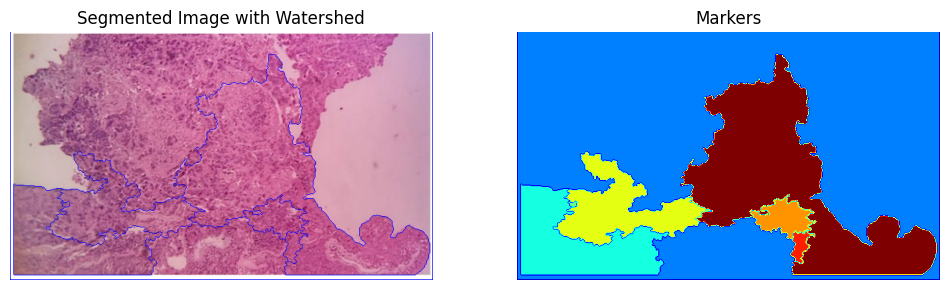

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/tumor107.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Preprocessing - Apply Gaussian blur
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 2: Thresholding - Apply binary threshold
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 3: Distance Transform
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
sure_bg = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=3)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 4: Marker Labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Step 5: Add one to all labels to ensure the background is not 0
markers = markers + 1

# Step 6: Mark the region of unknown with zero
markers[unknown == 255] = 0

# Step 7: Apply Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with Watershed')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(markers, cmap='jet')
plt.title('Markers')
plt.axis('off')

plt.show()
